# Exploring `gym-anytrading`

### Imports and Setup

In [1]:
# Gym stuff
import gym
import gym_anytrading

# Processing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
env = gym.make('stocks-v0', window_size=10)

### What are the attributes of the environmnet?

In [3]:
env.df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100
...,...,...,...,...,...,...
2018-08-23,1219.880005,1235.170044,1219.349976,1221.160034,1221.160034,1233300
2018-08-24,1226.000000,1237.400024,1221.420044,1236.750000,1236.750000,1222700
2018-08-27,1244.140015,1257.869995,1240.680054,1256.270020,1256.270020,1429000


In [4]:
type(env.df)

pandas.core.frame.DataFrame

In [5]:
env.prices # close prices from the dataframe from row 20 onwards

array([ 203.878876,  203.043045,  204.849854, ..., 1256.27002 ,
       1245.859985, 1264.650024])

In [6]:
all(env.df['Close'][20:].to_numpy() == env.prices)

True

In [7]:
env.signal_features # prices and np.diff(prices)

array([[ 2.03878876e+02,  0.00000000e+00],
       [ 2.03043045e+02, -8.35831000e-01],
       [ 2.04849854e+02,  1.80680900e+00],
       ...,
       [ 1.25627002e+03,  1.95200200e+01],
       [ 1.24585999e+03, -1.04100350e+01],
       [ 1.26465002e+03,  1.87900390e+01]])

In [8]:
all(env.signal_features[:,0] == env.prices), all(env.signal_features[:,1][1:] == np.diff(env.prices))

(True, True)

In [9]:
print("env information:")
print("> shape:", env.shape)
print("> df.shape:", env.df.shape)
print("> prices.shape:", env.prices.shape)
print("> signal_features.shape:", env.signal_features.shape)
print("> max_possible_profit:", env.max_possible_profit())

env information:
> shape: (10, 2)
> df.shape: (2335, 6)
> prices.shape: (2315,)
> signal_features.shape: (2315, 2)
> max_possible_profit: 324533.23901761015


### What does the environment look like?

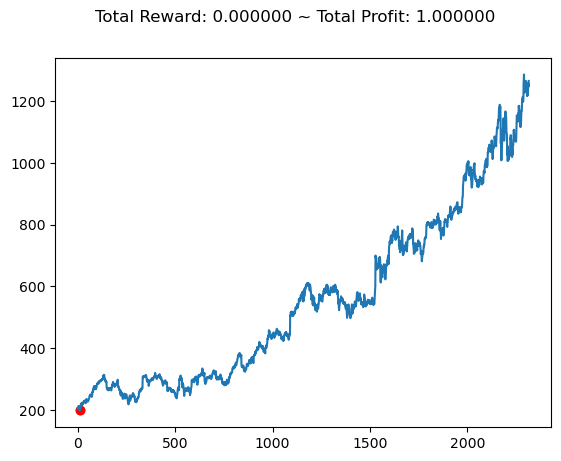

In [10]:
env.reset()
env.render()

In [11]:
env.action_space # sell (0) or buy (1)

Discrete(2)

### What are the observations?

In [12]:
observation = env.reset()

In [13]:
observation # this is the previous 10 rows of signal_features

array([[203.043045,  -0.835831],
       [204.849854,   1.806809],
       [208.093094,   3.24324 ],
       [212.872879,   4.779785],
       [212.282288,  -0.590591],
       [211.006012,  -1.276276],
       [209.704712,  -1.3013  ],
       [204.449448,  -5.255264],
       [205.01001 ,   0.560562],
       [198.513519,  -6.496491]])

In [14]:
all((observation == env.signal_features[1:11]).flatten())

True

### Example with a random policy

Info: {'total_reward': 604.4734980000012, 'total_profit': 0.0007069504989593874, 'position': 0}


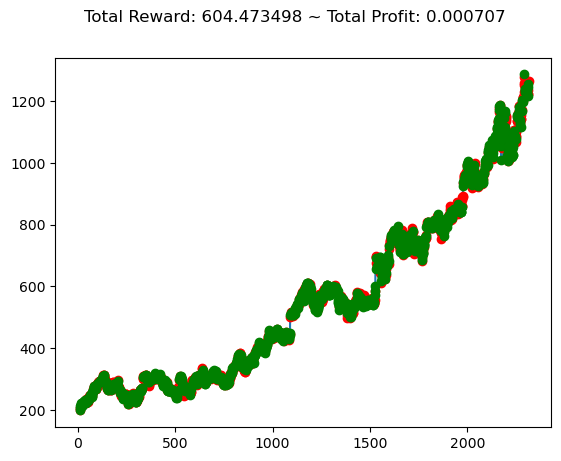

In [15]:
observation = env.reset()
while True:
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        print('Info:', info)
        break

env.render_all()
plt.show()